In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165623,117548.0,1.985312,-0.000947,-1.043759,0.382149,-0.204877,-1.352656,0.212740,-0.330638,0.207475,...,0.342770,1.139372,0.046995,0.602678,0.181897,-0.165429,-0.019397,-0.061227,4.95,0
275067,166352.0,2.044985,0.514531,-2.552752,1.207019,1.413456,-0.268601,0.573523,-0.167312,-0.151482,...,-0.028385,0.128089,-0.080681,-0.081376,0.551532,-0.501023,-0.001917,-0.039075,1.00,0
29114,35328.0,-2.280510,-1.270713,-0.343805,-1.115166,-4.501903,2.785883,2.251862,-4.248874,-0.789066,...,-1.572430,0.599341,-7.474414,0.786035,-2.174441,-0.552313,1.226567,-0.738261,1762.20,0
128952,78899.0,-0.421121,0.755018,1.290966,-0.457148,0.442457,-0.795068,0.695408,-0.068811,-0.323748,...,-0.163727,-0.588932,-0.003035,-0.183541,-0.543645,-0.079439,0.090652,0.150890,1.29,0
92491,63957.0,-0.498026,0.744228,2.154884,1.168989,-0.034244,0.519921,0.322362,0.173024,0.009358,...,0.034859,0.512178,-0.221466,0.150598,0.074992,-0.221506,0.192851,0.129287,16.24,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
data = data[cols]
data.columns

Index(['scaled_amount', 'scaled_time', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5',
       'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# We have, very imbalanced data, 284315 non_fraud cases and 492 fraud cases
# 0 for non fraud cases
# 1 for fraud cases

In [9]:
# shuffle the data
data = data.sample(frac=1)

# len(fraud cases) is 492
# separate fraud cases and select 492 non fraud cases  
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] != 1][:492]

# Concatenate fraud and non fraud data
normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
151308,-0.251520,0.124954,95328.0,-0.763885,1.317824,1.122126,0.718779,0.609939,1.201253,-0.183545,...,-0.187890,-0.396661,-0.105542,-0.295565,-0.236774,-0.796855,-0.085237,0.078117,4.00,0
143728,-0.293440,0.010350,85573.0,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,...,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1.00,1
269870,1.498079,0.929522,163812.0,-0.821879,0.690047,-0.375779,-0.199338,1.325374,-0.355384,2.039431,...,-0.319837,-0.234008,-0.209271,0.518438,-0.117333,0.148442,-0.708108,-0.436887,129.21,0
215953,-0.296653,0.653215,140293.0,0.951025,3.252926,-5.039105,4.632411,3.014501,-1.349570,0.980940,...,1.404524,-0.760549,0.358292,-1.185942,-1.286177,0.000365,0.169662,0.108276,0.77,1
114271,-0.077133,-0.132567,73408.0,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,...,0.528421,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,16.48,1


In [10]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [11]:
# Now we have balanced data that is equal distributed among fraud and non fraud cases

In [12]:
#Now WE have to remove the outliers

In [13]:
# Removing ouliers from fraud values of v10,v12 & v14 to increase the accuracy of our model


for x in ['V14', 'V12', 'V10']:
    Column_Values = new_data[x].loc[new_data["Class"] == 1].values
    q25, q75 = np.percentile(Column_Values, 25), np.percentile(Column_Values, 75)
    values_iqr = q75 - q25
    values_cut_off = values_iqr * 1.5
    values_lower, values_upper = q25 - values_cut_off, q75 + values_cut_off
    outliers = [x for x in Column_Values if x < values_lower or x > values_upper]
    print(f"{x} column has {len(outliers)} outliers")
    new_data = new_data.drop(new_data[(new_data[x] < values_lower) | (new_data[x] > values_upper)].index)
    print(f"Number of instances after outliers removal of column {x} is {len(new_data)}")

V14 column has 4 outliers
Number of instances after outliers removal of column V14 is 980
V12 column has 4 outliers
Number of instances after outliers removal of column V12 is 976
V10 column has 27 outliers
Number of instances after outliers removal of column V10 is 947


In [14]:
# Seaprate features and targets
X = new_data.loc[:,new_data.columns != 'Class']
Y = new_data.loc[:,new_data.columns == 'Class']

In [15]:
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [16]:
# 50% training, 30% testing, 20% Validating 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train, x_val,  y_train, y_val  = train_test_split(x_train, y_train, test_size=0.285, random_state=42)

In [17]:
x_train.shape[1]

32

In [18]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=100, batch_size=3, validation_data=(x_val, y_val))

Epoch 1/100
158/158 [==============================] - 1s 3ms/step - loss: 0.6364 - accuracy: 0.7886 - val_loss: 0.5877 - val_accuracy: 0.8730
Epoch 2/100
158/158 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.8795 - val_loss: 0.4839 - val_accuracy: 0.8995
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.9006 - val_loss: 0.3663 - val_accuracy: 0.9153
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.9091 - val_loss: 0.3062 - val_accuracy: 0.9206
Epoch 5/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.9197 - val_loss: 0.2815 - val_accuracy: 0.9206
Epoch 6/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9239 - val_loss: 0.2685 - val_accuracy: 0.9206
Epoch 7/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9260 - val_loss: 0.2571 - val_accuracy: 0.9259

Epoch 58/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9725 - val_loss: 0.2871 - val_accuracy: 0.9101
Epoch 59/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9725 - val_loss: 0.3001 - val_accuracy: 0.9048
Epoch 60/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9704 - val_loss: 0.3127 - val_accuracy: 0.8995
Epoch 61/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9725 - val_loss: 0.2964 - val_accuracy: 0.9048
Epoch 62/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9662 - val_loss: 0.3086 - val_accuracy: 0.9048
Epoch 63/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9662 - val_loss: 0.3076 - val_accuracy: 0.8995
Epoch 64/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9746 - val_loss: 0.3336 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

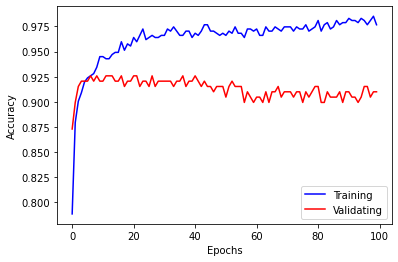

In [21]:
plt.plot(np.arange(0,len(history.history['accuracy'])), history.history['accuracy'], 'b', label='Training')
plt.plot(np.arange(0,len(history.history['val_accuracy'])), history.history['val_accuracy'], '-r', label='Validating')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [22]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.9439


In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred = np.array(y_pred.reshape(y_pred.shape[0]))

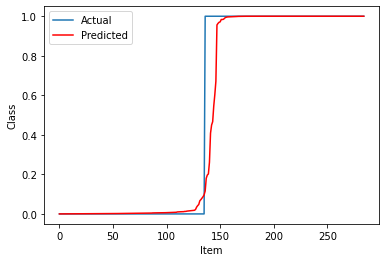

In [25]:
plt.plot(sorted(y_test.values), label='Actual')
plt.plot(sorted(y_pred), 'r', label='Predicted')
plt.ylabel('Class')   
plt.xlabel('Item')
plt.legend()
plt.show()